In [1]:
import numpy as np

In [2]:
n=30
x1=np.random.uniform(-3.2,2,size=n)

In [3]:
b=[45,-6,1.2,-1,0.01]
hata=np.random.normal(0,4,size=n)

In [7]:
y=b[0] \
+b[1]*x1 \
+b[2]*x1**2 \
+b[3]*x1**3 \
+b[4]*x1**4 + hata

In [8]:
import matplotlib.pyplot as plt

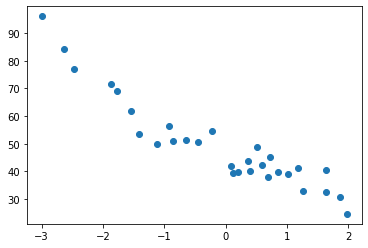

In [9]:
plt.scatter(x1,y)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
decision_tree = DecisionTreeRegressor()

## Independent Variable `x1`

In [12]:
x1[:5]

array([ 0.59106278,  1.63210565, -1.87244073,  1.26756108, -0.93152268])

## Dependent Variable `y`

In [13]:
y[:5]

array([42.21803159, 40.30381369, 71.79025782, 32.9329908 , 56.54657628])

Fitting the model:

In [14]:
decision_tree.fit(x1.reshape(-1,1), y)

DecisionTreeRegressor()

In [15]:
decision_tree.score(x1.reshape(-1, 1), y)

1.0

## Plotting the model's decisions

In [16]:
x_range = np.linspace(x1.min(), x1.max(), 1500)

y_range = decision_tree.predict(x_range.reshape(-1, 1))

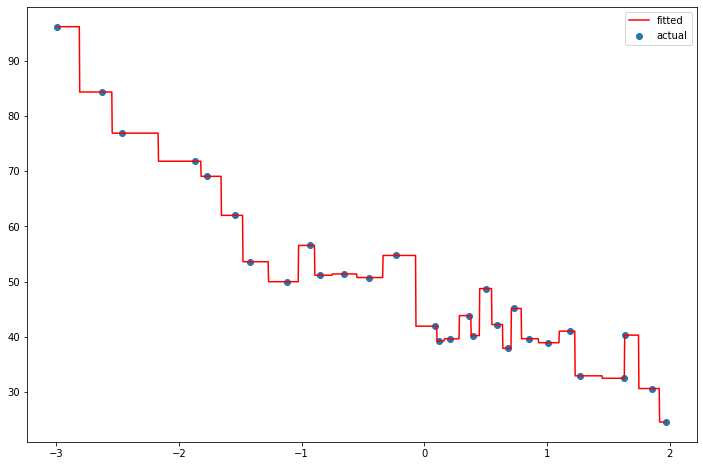

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [18]:
x2=np.random.uniform(-3.2,2,size=30)
y2=b[0] \
+b[1]*x2 \
+b[2]*x2**2 \
+b[3]*x2**3 \
+b[4]*x2**4 + hata

In [19]:
model.score(x2.reshape(-1, 1), y2)

NameError: name 'model' is not defined

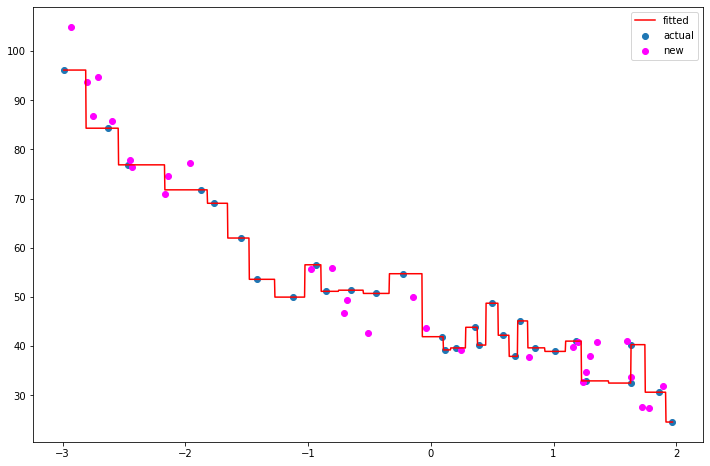

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
plt.scatter(x2,y2, label='new', color='magenta')

plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [54]:
import sklearn.model_selection as ms

## Splitting the data into train and test sets

In [85]:
# x1 ve y ile model kuruluyor
x1=x1.reshape(n,1)
y=y.reshape(n,1)
x1_train,x1_test,y_train,y_test = ms.train_test_split(x1,y,test_size=0.2, random_state=0)

In [114]:
decision_tree = DecisionTreeRegressor(max_depth=2)

In [115]:
decision_tree.fit(x1_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Checking scores for train and test sets

In [116]:
decision_tree.score(x1_train, y_train)

0.9429445645845098

In [117]:
decision_tree.score(x1_test, y_test)

0.9196270292754612

In [118]:
depths = [10,9,8,7,6,5,4,3,2,1]

trains = []
tests = []

for d in depths:
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(x1_train, y_train)
    trains.append(decision_tree.score(x1_train, y_train))
    tests.append(decision_tree.score(x1_test, y_test))

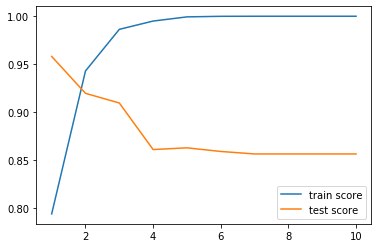

In [119]:
plt.plot(depths, trains, label='train score')
plt.plot(depths, tests, label='test score')
plt.legend()

In [121]:
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(x1.reshape(-1, 1), y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

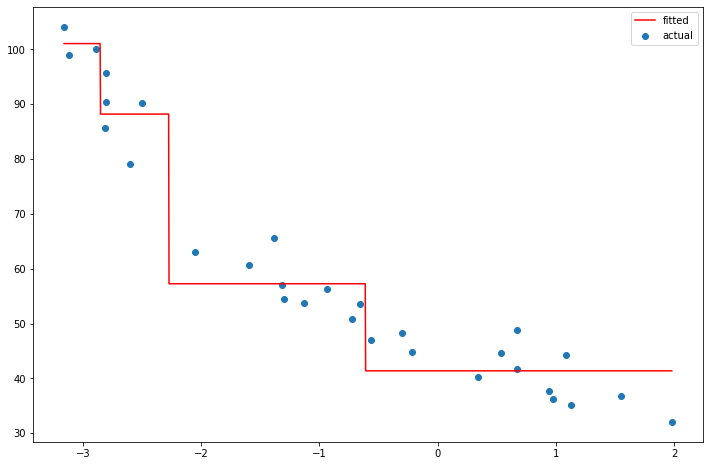

In [123]:
x_range = np.linspace(x1.min(), x1.max(), 1500)

y_range = decision_tree.predict(x_range.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(x1,y, label='actual')
# plt.scatter(x2,y2, label='new', color='magenta')

plt.plot(x_range, y_range, label='fitted', color='red')
plt.legend()

In [124]:
from sklearn.model_selection import cross_validate

In [132]:
cross_validate(decision_tree, x1, y, cv=10, return_train_score=True)

{'fit_time': array([0.        , 0.0010004 , 0.00099826, 0.        , 0.        ,
        0.        , 0.00101066, 0.00099993, 0.        , 0.        ]),
 'score_time': array([0.00099921, 0.00199771, 0.        , 0.00099683, 0.        ,
        0.00098777, 0.        , 0.        , 0.        , 0.0010128 ]),
 'test_score': array([ 0.58331075,  0.97068302,  0.85681761,  0.9549505 ,  0.403239  ,
        -0.27658861,  0.97558613, -0.57624947,  0.85059395,  0.71349835]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [143]:
depths = [10,9,8,7,6,5,4,3,2,1]

trains = []
tests = []

for d in depths:
    decision_tree = DecisionTreeRegressor(max_depth=d)
#     decision_tree.fit(x1_train, y_train)
    cv = cross_validate(decision_tree, x1, y, cv=5, return_train_score=True)
    trains.append(cv['train_score'].mean())
    tests.append(cv['test_score'].mean())

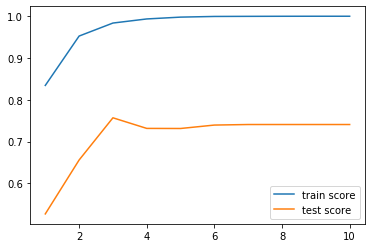

In [144]:
plt.plot(depths, trains, label='train score')
plt.plot(depths, tests, label='test score')
plt.legend()

In [191]:
from sklearn.datasets import make_regression

In [194]:
X, y = make_regression(n_samples=100, n_features=2, random_state=42)

- Parametre secimi
- Egitim-Test setleri ayrimi

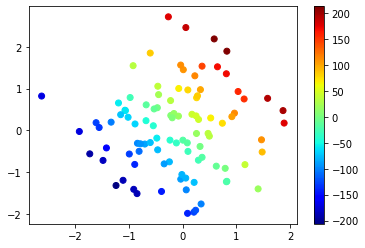

In [195]:
plt.scatter(X.T[0], X.T[1], c=y, cmap='jet')
plt.colorbar()

In [196]:
model = DecisionTreeRegressor(max_depth=15)
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [197]:
x1 = np.linspace(X.T[0].min(), X.T[0].max(), 500)
x2 = np.linspace(X.T[1].min(), X.T[1].max(), 500)

xx1, xx2 = np.meshgrid(x1, x2)

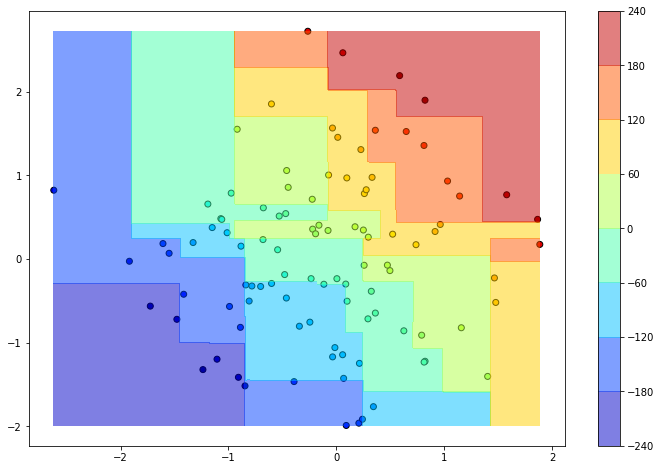

In [198]:
plt.figure(figsize=(12,8))
plt.scatter(X.T[0], X.T[1], c=y, cmap='jet', edgecolors='black')
plt.contourf(xx1, xx2, model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(*xx1.shape), cmap='jet', alpha=0.5)
plt.colorbar()

In [202]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, random_state=42)

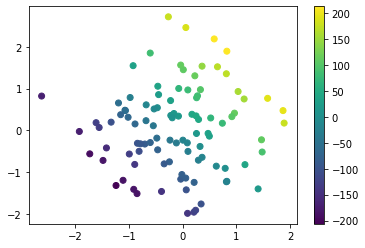

In [204]:
plt.scatter(X.T[0], X.T[1], c=y)
plt.colorbar()

- Parametre secimi
- Egitim-Test setleri ayrimi

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [228]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print('Train score:', tree.score(X_train, y_train))
print('Test score:', tree.score(X_test, y_test))

Train score: 1.0
Test score: 0.8153817879430723


In [225]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)
print('Train score:', tree.score(X_train, y_train))
print('Test score:', tree.score(X_test, y_test))

Train score: 0.946438148175988
Test score: 0.835478440426749


+Egitim seti uzerinde yuksek tahmin yetenegi  
-Test skoru dusuk, ezberlemeye meyilli  
-Yogun bir capraz dogrulama ve dikkatli parametre secim ihtiyaci

+Yorumlanabilirlik  
+Degiskenlerin onem derecesini ortaya koyma

+Lineer ya da non-lineer veri setleri uzerinde uygulanabilir.

+Veri icin herhangi bir onislem yapma ihtiyaci yok.


Algoritma icin: statquest
https://www.youtube.com/watch?v=7VeUPuFGJHk

## Exporting a decision tree

In [180]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='agac.tree')

## Feature Importances

In [182]:
model.feature_importances_

array([0.03878434, 0.96121566])

In [265]:
from sklearn.linear_model import LinearRegression, Ridge

In [266]:
degree=[1,2,3,4,5,6,7,8,9]
poli_train=[]
poli_test=[]
for dg in degree:
    poli_model=PolynomialFeatures(degree=dg,include_bias=False)
    xp=poli_model.fit_transform(x1_train)
    print(xp.shape)
    model=LinearRegression()
    model.fit(xp,y_train)
    poli_train.append(model.score(xp,y_train))
    poli_test.append(model.score(poli_model.transform(x1_test),y_test))

(24, 1)
(24, 2)
(24, 3)
(24, 4)
(24, 5)
(24, 6)
(24, 7)
(24, 8)
(24, 9)


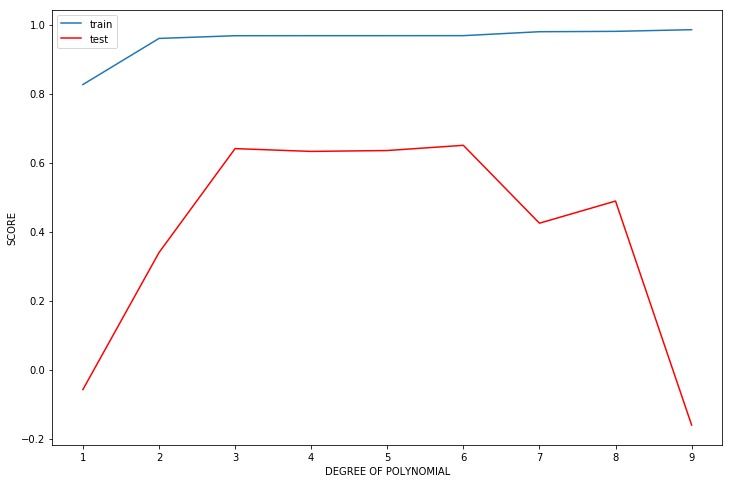

In [267]:
plt.figure(figsize=(12,8))
plt.plot(degree,poli_train,label='train')
plt.plot(degree,poli_test,color='red',label='test')
plt.xlabel('DEGREE OF POLYNOMIAL')
plt.ylabel('SCORE')
plt.legend()

In [268]:
poli_model_4=PolynomialFeatures(degree=4)
pm4=poli_model_4.fit_transform(x1_train)

In [269]:
linear_4=LinearRegression()

In [270]:
linear_4.fit(pm4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
linear_4.score(pm4,y_train)

0.9677105535039205

In [272]:
linear_4.score(poli_model_4.transform(x1_test),y_test)

0.6322677230984943

In [273]:
linear_4.intercept_

array([42.92524026])

In [274]:
linear_4.coef_

array([[ 0.        , -7.14799549,  2.12768675, -0.6030714 ,  0.08984574]])

In [275]:
b

[45, -6, 1.2, -1, 0.01]

In [276]:
y_pred=linear_4.predict(pm4)

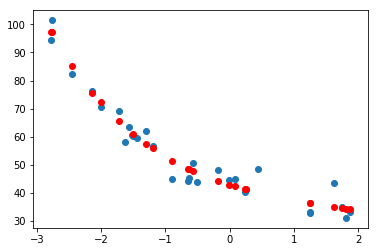

In [277]:
plt.scatter(x1,y)
plt.scatter(x1_train,y_pred,color='red')

In [290]:
x_range=np.linspace(-3.1,2.2,500).reshape(-1,1)

In [296]:
poli_model_2=PolynomialFeatures(degree=1)
pm2=poli_model_2.fit_transform(x1_train)
linear_2=LinearRegression()
linear_2.fit(pm2,y_train)
y_pred2=linear_2.predict(poli_model_2.transform(x_range))

In [297]:
poli_model_4=PolynomialFeatures(degree=4)
pm4=poli_model_4.fit_transform(x1_train)
linear_4=LinearRegression()
linear_4.fit(pm4,y_train)
y_pred4=linear_4.predict(poli_model_4.transform(x_range))

poli_model_12=PolynomialFeatures(degree=7)
pm12=poli_model_12.fit_transform(x1_train)
linear_12=LinearRegression()
linear_12.fit(pm12,y_train)
y_pred12=linear_12.predict(poli_model_12.transform(x_range))

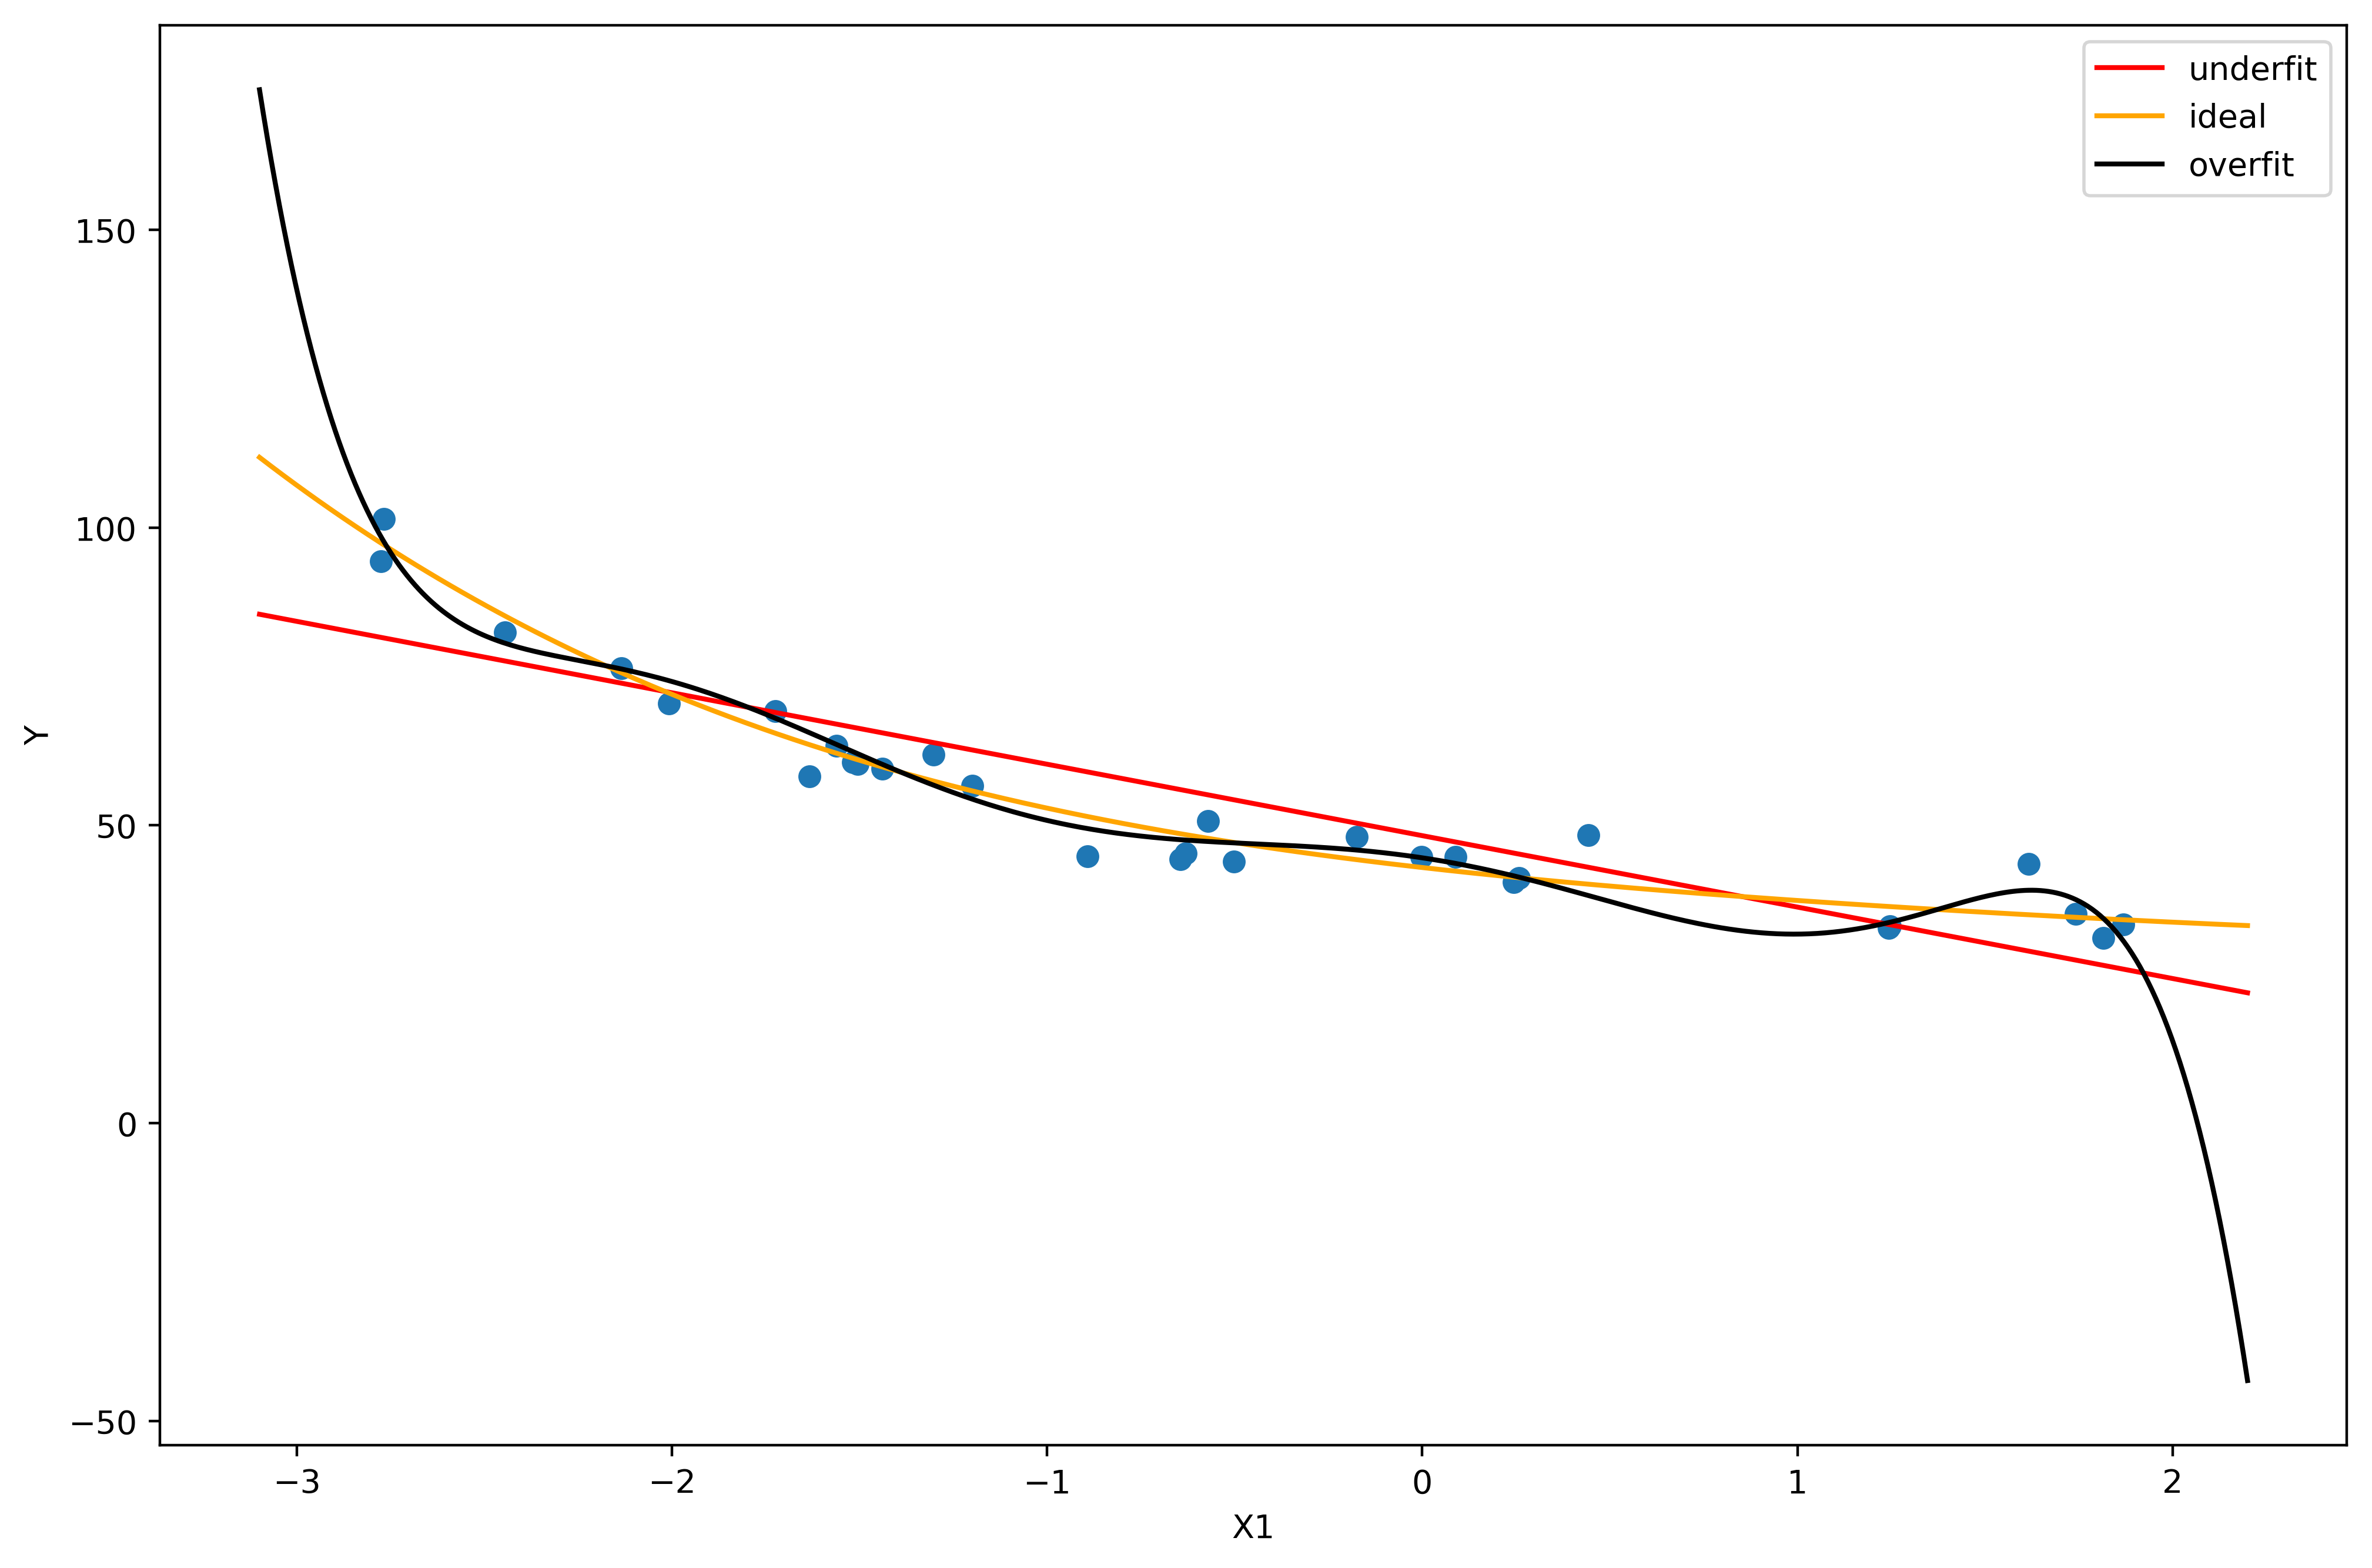

In [298]:
plt.figure(figsize=(12,8), dpi=400)
plt.scatter(x1,y)
plt.plot(x_range,y_pred2,color='red',label='underfit')
plt.plot(x_range,y_pred4,color='orange',label='ideal')
plt.plot(x_range,y_pred12,color='black',label='overfit')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()

In [303]:
linear_12.intercept_

array([44.55649902])